In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sampling.hmc_sampling import *
from models.regression_model import *
from models.ld_regression_model import *

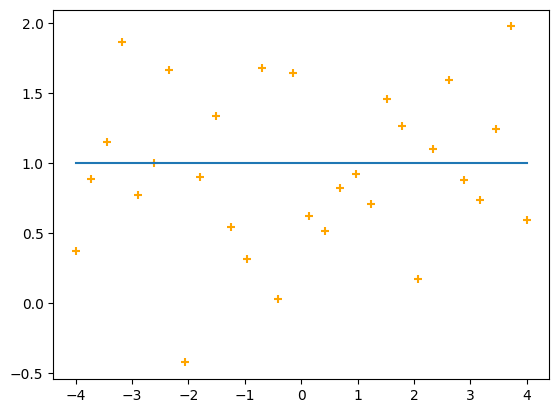

In [2]:
sigma = 0.5
x_test = np.linspace(-4, 4, 30)
y_test = np.ones(len(x_test))
x_train = x_test.copy()
y_train = y_test + np.random.normal(0, sigma, len(x_train))
plt.scatter(x_train, y_train, marker='+', color='Orange')
plt.plot(x_test, y_test)
plt.show()

In [3]:
# dimensions of output from basis function
d_dash = 1

# phi function for LR
def phi(x):
	return np.array([1], dtype=object)

In [4]:
b = 1/sigma**2
var_prior = 1
A = np.linalg.inv(np.diag(np.full(d_dash, var_prior)))
model = RegressionModel(x_train, y_train, np.full(len(x_train), b), A, phi)
ld_model = LDRegressionModel(x_train, y_train, np.full(len(x_train), b), A, phi)

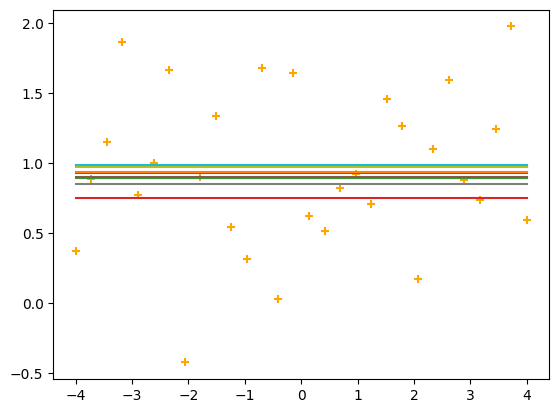

In [5]:
test_samples = np.random.multivariate_normal(ld_model.mean, ld_model.Hinv, size=10)
for s in test_samples:
	plt.plot(x_test, np.full(len(x_test), s[0]))
plt.scatter(x_train, y_train, marker='+', color='Orange')

In [6]:
mean = ld_model.mean[0]
var = ld_model.Hinv[0][0]

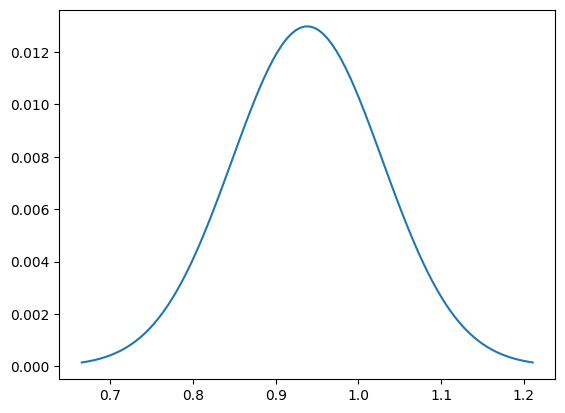

In [7]:
x = np.linspace(mean - 3*np.sqrt(var), mean + 3*np.sqrt(var), 100)
y = (1/2*np.pi*var)*np.exp(-np.array([ld_model.U(x[i]) for i in range(len(x))]))
plt.plot(x, y)

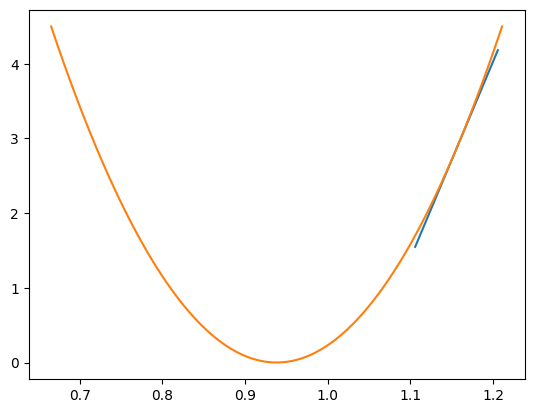

In [8]:
from random import randint
x = np.linspace(mean - 3*np.sqrt(var), mean + 3*np.sqrt(var), 100)
y = np.array([ld_model.U(x[i]) for i in range(len(x))])
sample = randint(0, len(x))
dt = 0.1
grad = model.grad_U(np.array([x[sample]]), 30)
plt.plot([x[sample] - dt/2, x[sample] + dt/2], [y[sample] - grad*dt/2, y[sample] + grad*dt/2], zorder=2)
plt.plot(x, y)

In [15]:
sampler = HMCsampler(0.01, model, M=np.diag(np.full(d_dash, 10000)))
accept, samples = sampler.sample(100, int_samples=10)

100%|██████████| 100/100 [00:00<00:00, 1163.00it/s]


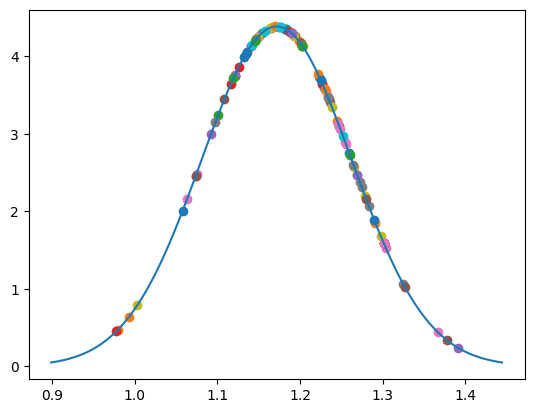

In [16]:
f = lambda x : (1/np.sqrt(2*np.pi*var)) * np.exp(-0.5*(1/var)*(x - mean)**2)
x = np.linspace(mean + 3*np.sqrt(var), mean - 3*np.sqrt(var), 100)
y1 = f(x)
fig, ax = plt.subplots()
ax.plot(x, y1)
for s in samples:
	ax.scatter(s, f(s))
plt.show()

100%|██████████| 100/100 [00:03<00:00, 31.61it/s]


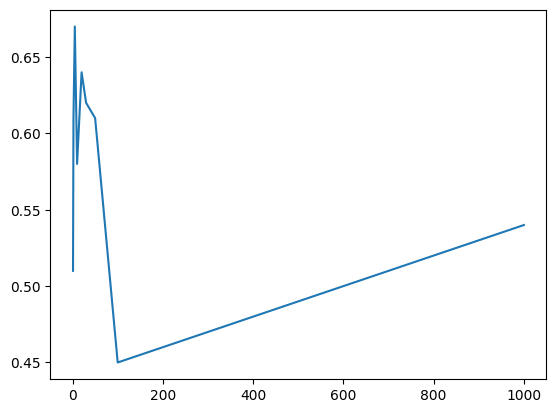

In [12]:
# acceptance probabilities
int_samples = np.array([1, 2, 5, 10, 20, 30, 50, 100, 1000])
acceptance = np.zeros(len(int_samples))
sampler = HMCsampler(0.01, model)
for i, s in enumerate(int_samples):
	accept, _ = sampler.sample(100, int_samples=s)
	acceptance[i] = accept
plt.plot(int_samples, acceptance)

100%|██████████| 100/100 [00:00<00:00, 1753.57it/s]


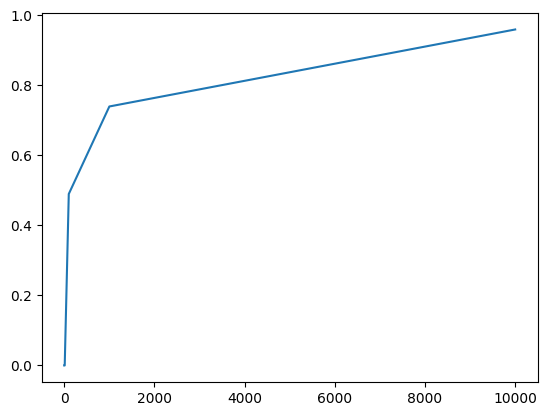

In [13]:
# mass matrix
m_vals = np.array([0.01, 0.1, 1, 2, 5, 10, 100, 1000, 10000])
acceptance = np.zeros(len(m_vals))
for i, m in enumerate(m_vals):
	sampler = HMCsampler(0.01, model, M=np.diag(np.full(d_dash, m)))
	accept, _ = sampler.sample(100, int_samples=10)
	acceptance[i] = accept
plt.plot(m_vals, acceptance)